In [210]:
'''
CS6140 Assignment 4
Q3 Outlier Detection using Zscore
Jul 14 2022
Wing Man, Kwok
'''

'\nCS6140 Assignment 4\nQ3 Outlier Detection using Zscore\nJul 14 2022\nWing Man, Kwok\n'

In [211]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy import sort
from scipy.stats import t, chi2         # To compute T score and chi square

   Height(Inches)  Weight(Pounds)
0       -1.162051       -1.208072
1        1.852136        0.806805
2        0.739165        2.225214
3        0.117523        1.308328
4       -0.107961        1.476561


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


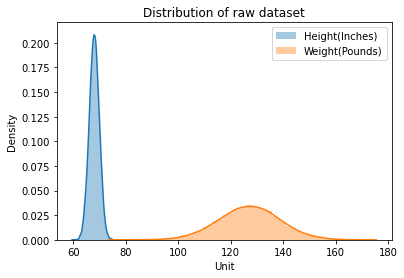

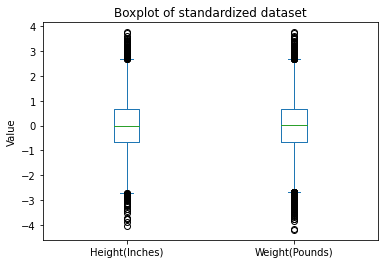


EDA by df.describe(): 

       Height(Inches)  Weight(Pounds)
count    25000.000000    25000.000000
mean        67.993114      127.079421
std          1.901679       11.660898
min         60.278360       78.014760
25%         66.704397      119.308675
50%         67.995700      127.157750
75%         69.272958      134.892850
max         75.152800      170.924000


In [212]:
#Data clean up

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CS6140 Assignment4/HeightWeight.csv")
df = df.drop('Index', axis=1)     #drop index column 

df_mean = np.mean(df, axis = 0)
df_std = np.std(df, axis = 0)
df_standardized = (df - df_mean) / df_std
print(df_standardized.head(5))

#EDA for dataset visualization - distribution
sns.distplot(df["Height(Inches)"], label = "Height(Inches)")
sns.distplot(df["Weight(Pounds)"], label = "Weight(Pounds)")
plt.xlabel("Unit")
plt.legend()
plt.title("Distribution of raw dataset")
plt.show()

#EDA by boxplot
df_standardized[["Height(Inches)", "Weight(Pounds)"]].plot(kind = "box")
plt.ylabel("Value")
plt.title("Boxplot of standardized dataset")
plt.show()

#EDA by df.describe()
print("\nEDA by df.describe():", "\n")
print(df.describe())

In [213]:
def compute_grubs_threshold(N):
  
  print("Total number of samples:", N)
  alpha = 0.95
  t_val = t.ppf(1 - alpha / (2 * N), N - 2)
  grubs_threshold = ((N-1)/np.sqrt(N)) * (np.sqrt(t_val**2 / ((N-2 + t_val**2))))

  return grubs_threshold

In [214]:
def detect_outliners(df):
  pass

In [215]:
def print_outliners(outliner_row_index1,outliner_row_index2, threshold):
  outliners_index = np.append(outliner_row_index1,outliner_row_index2)
  outliners_index = np.unique(outliners_index)
  outliners_index.sort(kind='mergesort')
  num_outliners = outliners_index.size

  print("Results - Number of outliners found:", num_outliners, ", threshold", threshold, "\n")
  print(df.iloc[outliners_index].head(5).to_string(index = False), "\n")

In [216]:
#Detect outliners
grubs_threshold = compute_grubs_threshold(N = df.shape[0])
print("grubs_threshold", grubs_threshold, "\n")

df_standardized["Height_grub"] = df_standardized["Height(Inches)"].abs() >= grubs_threshold
df_standardized["Weight_grub"] = df_standardized["Weight(Pounds)"].abs() >= grubs_threshold

print("Univariate outliners - Height:")
print("------------------------------")
print(df_standardized.loc[df_standardized["Height_grub"] == True], "\n") 

print("Univariate outliners - Weight:")
print("------------------------------")
print(df_standardized.loc[df_standardized["Weight_grub"] == True], "\n")

print("Sum of Squares")
print("--------------")
df_standardized["sum_of_square"] = (df_standardized[["Height(Inches)", "Weight(Pounds)"]] ** 2 ).sum(axis = 1)
print(df_standardized, "\n")

chi_square_threhold = chi2.ppf(q = 0.95, df = len(df.columns))
print("chi_square_threhold:", chi_square_threhold, "\n")

df_standardized["Multivariate_Outliner"] = df_standardized["sum_of_square"] > chi_square_threhold
print("Number of multivariate outliners found:", len(df_standardized.loc[df_standardized["Multivariate_Outliner"] == True]), "\n")
print("First 5 Multivariate outliners:")
print("-------------------------------")
print(df_standardized.loc[df_standardized["Multivariate_Outliner"] == True].head(5), "\n") 

Total number of samples: 25000
grubs_threshold 4.118657449717094 

Univariate outliners - Height:
------------------------------
Empty DataFrame
Columns: [Height(Inches), Weight(Pounds), Height_grub, Weight_grub]
Index: [] 

Univariate outliners - Weight:
------------------------------
       Height(Inches)  Weight(Pounds)  Height_grub  Weight_grub
14106       -3.200322       -4.160275        False         True
22945       -3.190257       -4.207707        False         True 

Sum of Squares
-----------
       Height(Inches)  Weight(Pounds)  Height_grub  Weight_grub  sum_of_square
0           -1.162051       -1.208072        False        False       2.809800
1            1.852136        0.806805        False        False       4.081340
2            0.739165        2.225214        False        False       5.497944
3            0.117523        1.308328        False        False       1.725535
4           -0.107961        1.476561        False        False       2.191887
...               